In [5]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (12, 10)

from subtle.data_loaders import SliceLoader
import subtle.subtle_loss as suloss

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

<Figure size 432x288 with 0 Axes>

In [17]:
fpath_h5 = '/home/srivathsa/projects/studies/gad/tiantan/preprocess/data/NO26.h5'
data_loader = SliceLoader(
    data_list=[fpath_h5], batch_size=1, shuffle=False, verbose=1,
    slices_per_input=1, resize=240, slice_axis=[0], predict=False
)

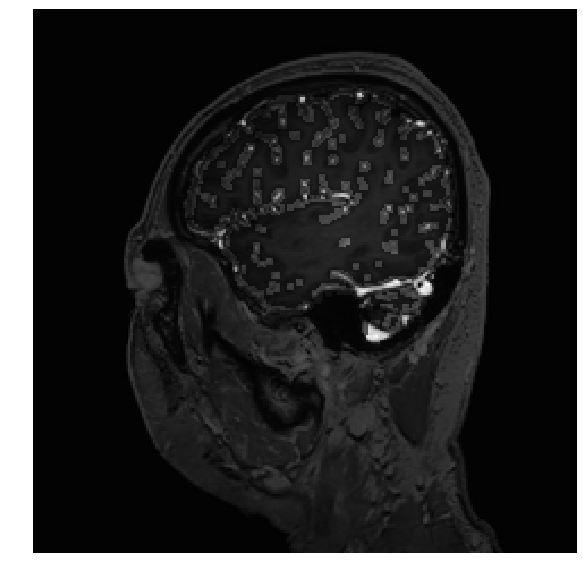

In [25]:
X, Y = data_loader.__getitem__(50)
gt = Y[0, ..., 0]
mask = Y[0, ..., 1].astype(bool)

gt[~mask] *= 0.75
gt[mask] *= 2

sigmoid = lambda x: 1 / (1 + np.exp(-x))

show_img(gt)